## Подключение модулей и чтение файла¶

In [41]:
# импорт необходимых пакетов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import re
from datetime import datetime, timedelta
from collections import Counter
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_excel('12110000300120200003_Удельный_вес_малых_предприятий,_осуществлявших_технологические_инновации,_в_общ.xlsx')  # чтение данных из CSV файла

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  95 non-null     object 
 1   2007 г.     90 non-null     float64
 2   2009 г.     90 non-null     float64
 3   2011 г.     90 non-null     float64
 4   2013 г.     82 non-null     float64
 5   2015 г.     94 non-null     float64
 6   2017 г.     87 non-null     float64
 7   2019 г.     86 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.1+ KB


In [4]:
df.head(10)

,Unnamed: 0,2007 г.,2009 г.,2011 г.,2013 г.,2015 г.,2017 г.,2019 г.
0,Российская Федерация,4.30,4.09,5.09,4.75,4.50,5.18,5.91
1,Центральный федеральный округ,3.60,3.60,5.00,5.24,4.32,5.78,6.56
2,Белгородская область,6.60,1.10,5.40,6.43,6.00,9.17,10.53
3,Брянская область,2.29,3.30,4.59,3.08,2.87,2.31,5.74
4,Владимирская область,4.59,2.80,4.40,4.30,5.12,6.35,4.63
5,Воронежская область,9.00,5.30,6.20,9.67,6.89,7.41,8.67
6,Ивановская область,0.60,3.20,2.80,4.07,2.72,4.91,3.07
7,Калужская область,3.60,4.40,5.50,6.58,5.33,5.63,5.38
8,Костромская область,6.00,4.90,3.50,2.72,2.68,2.73,3.61
9,Курская область,0.60,0.70,5.40,12.14,5.78,5.00,5.11


In [5]:
df.describe()

,2007 г.,2009 г.,2011 г.,2013 г.,2015 г.,2017 г.,2019 г.
count,90.000000,90.000000,90.000000,82.000000,94.000000,87.000000,86.000000
mean,4.095889,3.871111,4.800333,5.167561,4.274787,4.967126,5.742907
std,2.640351,2.090900,2.442776,2.877972,2.978344,2.873754,4.017441
min,0.000000,0.000000,0.000000,0.670000,0.000000,0.720000,0.960000
25%,2.290000,2.425000,3.325000,3.220000,2.365000,2.915000,3.365000
50%,4.045000,3.850000,5.090000,4.550000,3.715000,4.630000,5.140000
75%,5.800000,5.000000,6.175000,6.492500,5.770000,6.150000,6.895000
max,11.800000,9.400000,12.300000,16.670000,15.770000,16.670000,33.330000


<AxesSubplot:>

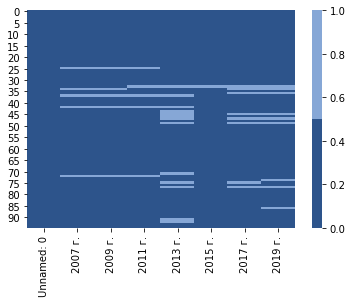

In [6]:
cols = df.columns[:]  # все колонки
# определяем цвета
# голубой - пропущенные данные, синий - не пропущенные
colours = ['#2d548b', '#86a7d6']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))

Unnamed: 0 - 0%
2007 г. - 5%
2009 г. - 5%
2011 г. - 5%
2013 г. - 14%
2015 г. - 1%
2017 г. - 8%
2019 г. - 9%


In [8]:
df.columns

Index(['Unnamed: 0', '2007 г.', '2009 г.', '2011 г.', '2013 г.', '2015 г.',
       '2017 г.', '2019 г.'],
      dtype='object')

In [9]:
# редактирование названий колонок
df.columns = [
    'region', '2007', '2009', '2011', '2013', '2015', '2017', '2019']

In [10]:
print('Количество регионов, представленных в наборе данных:',
      len(df.region.unique()))

Количество регионов, представленных в наборе данных: 95


In [11]:
# введение (присвоиение) пропущенных значений
# и создание индикаторных переменных отсутствующих значений для каждого числового столбца
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # выполнение только для столбцов, в которых отсутствуют значения.
        med = df[col].median()  # вычисление моды
        df[col] = df[col].fillna(med)  # заполнение ячейки модой

In [12]:
count_nan = len(df) - df.count()
print(count_nan)

region    0
2007      0
2009      0
2011      0
2013      0
2015      0
2017      0
2019      0
dtype: int64


In [13]:
rating_2019 = pd.read_excel('rating_2019.xlsx')  # чтение данных из CSV файла

In [14]:
rating_2019.columns

Index(['Unnamed: 0', 'rating_2019'], dtype='object')

In [15]:
# редактирование названий колонок
rating_2019.columns = [
    'region', 'rating_2019']

In [16]:
df = pd.merge(df, rating_2019, on='region', how='left')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       95 non-null     object 
 1   2007         95 non-null     float64
 2   2009         95 non-null     float64
 3   2011         95 non-null     float64
 4   2013         95 non-null     float64
 5   2015         95 non-null     float64
 6   2017         95 non-null     float64
 7   2019         95 non-null     float64
 8   rating_2019  73 non-null     float64
dtypes: float64(8), object(1)
memory usage: 7.4+ KB


<AxesSubplot:>

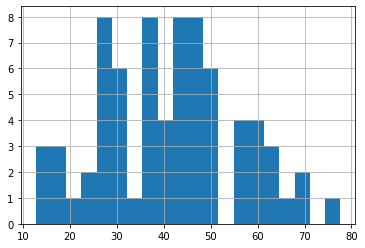

In [18]:
df['rating_2019'].hist(bins=20)

<AxesSubplot:>

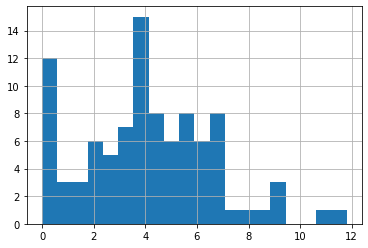

In [19]:
df['2007'].hist(bins=20)


<AxesSubplot:>

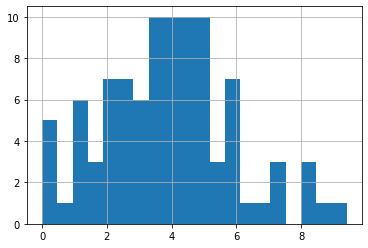

In [20]:
df['2009'].hist(bins=20)

<AxesSubplot:>

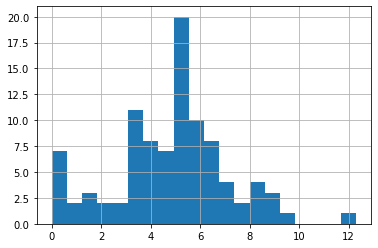

In [21]:
df['2011'].hist(bins=20)

<AxesSubplot:>

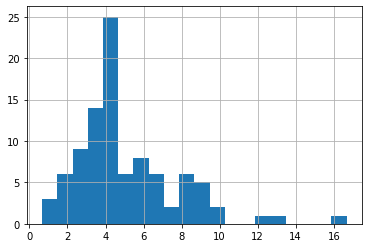

In [22]:
df['2013'].hist(bins=20)

<AxesSubplot:>

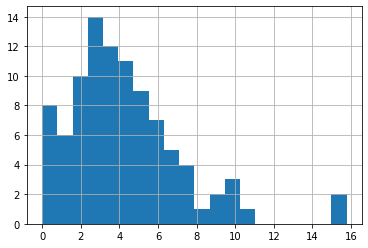

In [23]:
df['2015'].hist(bins=20)

<AxesSubplot:>

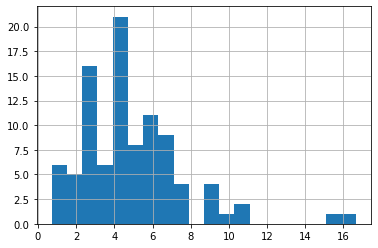

In [24]:
df['2017'].hist(bins=20)

<AxesSubplot:>

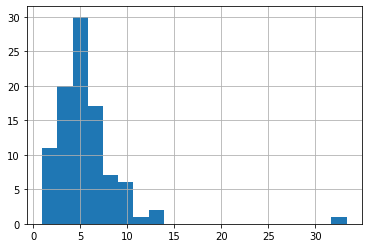

In [25]:
df['2019'].hist(bins=20)

Из графика видно, что мы имеем явный выброс в 2019 году

In [26]:
df['2019'].value_counts().sort_values()

5.74     1
9.02     1
6.02     1
10.19    1
3.95     1
        ..
2.87     2
5.85     2
6.90     2
4.08     2
5.14     9
Name: 2019, Length: 82, dtype: int64

25-й перцентиль: 3.675, 75-й перцентиль: 6.755, IQR: 3.08,  Границы выбросов: [-0.9450000000000003, 11.375].


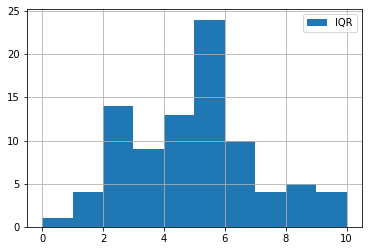

In [27]:
median = df['2019'].median()
IQR = df['2019'].quantile(0.75) - df['2019'].quantile(0.25)
perc25 = df['2019'].quantile(0.25)
perc75 = df['2019'].quantile(0.75)
print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR,
                                           l=perc75 + 1.5 * IQR))
df['2019'].loc[df['2019'].between(perc25 - 1.5 * IQR, perc75 +
                                            1.5 * IQR)].hist(bins=10,
                                                             range=(0, 10),
                                                             label='IQR')
plt.legend()

In [28]:
# Избавимся от выбросов
# df = df.loc[df['2019'].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
med_2019 = df['2019'].median()
df.loc[df['2019'] > 11.375, '2019'] = med_2019

In [29]:
med_rating_2019 = df['rating_2019'].median()
df['rating_2019'] = df['rating_2019'].fillna(med_rating_2019)

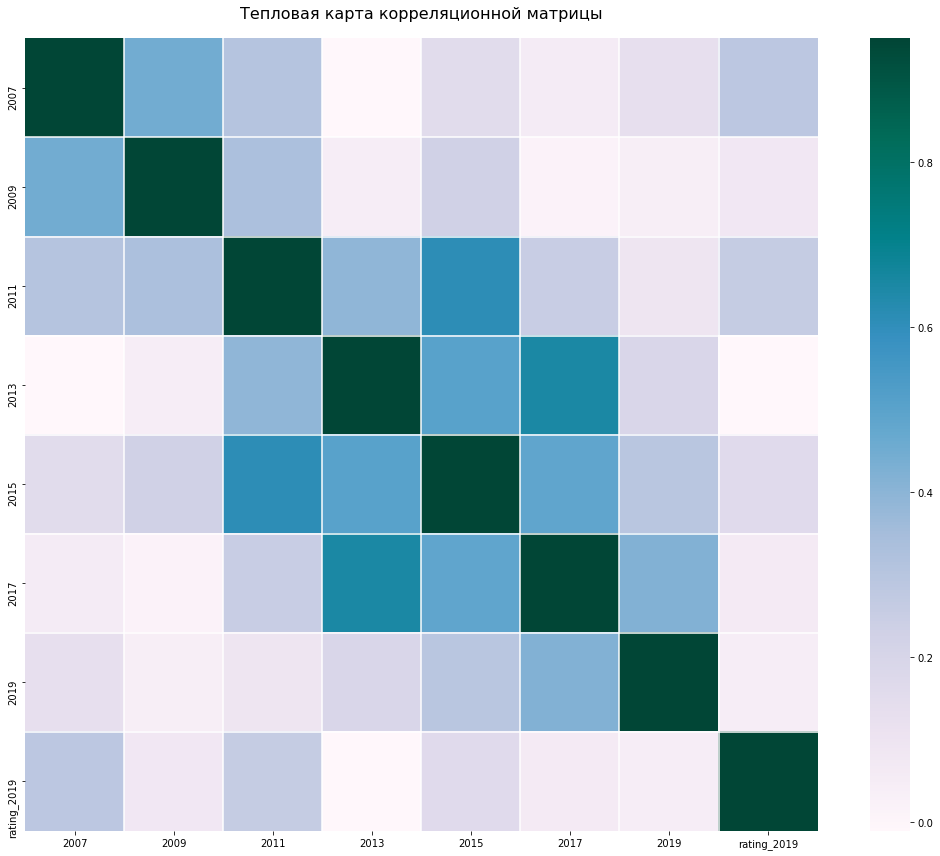

In [30]:
# Посмотрим на корреляционную матрицу
plt.rcParams['figure.figsize'] = (15, 10)
#corrmat = df_preproc.drop(['Sample'], axis=1).corr()
corrmat = df.corr()

f, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(corrmat, vmax=.95, cmap='PuBuGn', square=True)
#cmap= 'twilight_shifted'
sources = corrmat.columns.get_level_values(0)
for i, source in enumerate(sources):
    if i and source != sources[i - 1]:
        ax.axhline(len(sources) - i, c="w")
        ax.axvline(i, c="w")
ax.set_title('Тепловая карта корреляционной матрицы', fontsize=16, pad=20)
f.tight_layout()

In [31]:
# Просмотр числа оставшихся записей и признаков
print(df.shape)

(95, 9)


In [32]:
# Удаление столбцов, содержащих данные типа object¶
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    df = df.drop([col], axis=1)

## Train the model¶

In [38]:
# Выделим тестовую часть
#train_data = df_preproc.query('Sample == 1').drop(['Sample'], axis=1)
#test_data = df_preproc.query('Sample == 0').drop(['Sample'], axis=1)

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

random_seed = 42

y = df['rating_2019'].values  # наш таргет
X = df.drop(['rating_2019'], axis=1)

# Выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=random_seed)

# Проверяем
df.shape, df.shape, X.shape, X_train.shape, X_test.shape

((95, 8), (95, 8), (95, 7), (76, 7), (19, 7))

In [53]:
# Data processing and model training.

model = RandomForestRegressor(n_estimators=100,
                              verbose=1,
                              n_jobs=-1,
                              random_state=random_seed)
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = np.round(model.predict(X_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

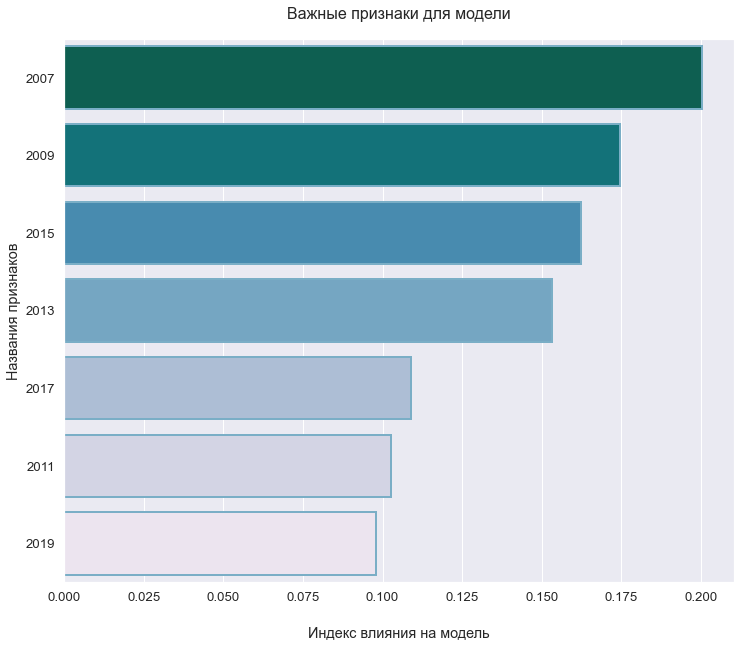

In [54]:
# Выведем график ещё раз на случай проблем с отображением первого
def feature_importance(importance, names):

    # Создадим массив признаков и их имён
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Создадим DataFrame, используя словарь
    data = {'Названия признаков': feature_names,
            'Индекс влияния на модель': feature_importance}
    fi_df = pd.DataFrame(data)

    # Сортируем признаки по убыванию важности
    fi_df.sort_values(by=['Индекс влияния на модель'], ascending=False, inplace=True)

    plt.figure(figsize=(12, 10))
    sns.barplot(x=fi_df['Индекс влияния на модель'], y=fi_df['Названия признаков'][:18],
                palette=("PuBuGn_r"), linewidth = 2, edgecolor='#7aaec6')
    sns.set(font_scale=1.2)
    plt.title('Важные признаки для модели', fontsize=16, pad=20)
    plt.xlabel('Индекс влияния на модель', labelpad=22)


feature_importance(model.feature_importances_, X.columns)

In [55]:
# Вычисляем коэффициент детерминации:
from sklearn import metrics

R2 = metrics.r2_score(y_test, y_pred)
print(round(R2, 2))

0.3


In [56]:
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def all_metrics(y_test, y_pred, y_pred_prob):
    result = pd.Series({
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_pred_prob)
    })
    return result

In [57]:
all_metrics(y_test, y_pred, y_pred_prob)

NameError: name 'y_pred_prob' is not defined

In [58]:
def confusion_matrix_plot(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cf_matrix = np.array([[tp, fp], [fn, tn]])
    group_names = ['TP', 'FP', 'FN', 'TN']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure()
    color_text = plt.get_cmap('PuBuGn')(0.95)
    sns.heatmap(cf_matrix,
                annot=labels,
                annot_kws={"size": 20},
                fmt='',
                cmap='PuBuGn',
                cbar=False,
                xticklabels=['Дефолт', 'Не дефолт'],
                yticklabels=['Дефолт', 'Не дефолт'])
    plt.ylabel('Предсказанные значения', fontsize=15, color=color_text)
    plt.xlabel('Реальные значения', fontsize=15, color=color_text)
    plt.title('Матрица ошибок', fontsize=16, pad=20)
    plt.rcParams['figure.figsize'] = (6, 6)
    plt.show()

    
def all_metrics(y_test, y_pred, y_pred_prob):
    result = pd.Series({
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_pred_prob)
    })
    return result

In [59]:
# Посмотрим на матрицу ошибок
plt.rcParams['figure.figsize'] = (6, 5)
confusion_matrix_plot(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [61]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['rating_2019'], axis=1)
y = df['rating_2019']

In [62]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [63]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [64]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [65]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

# MAE: 8.136684210526315

# MAE: 8.12077790674604

MAE: 8.12077790674604
